<a href="https://colab.research.google.com/github/fatemeh-ict/NLp/blob/main/spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [3]:
#read dataset
df=pd.read_csv('/content/SPAM text message 20170820 - Data.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [10]:
df['Category'].replace({'ham':0,'spam':1},inplace=True)

In [29]:
data={'category':['spam','ham'], 'number':[len(df.loc[df.Category==0]),len(df.loc[df.Category==1])]}
df_count=pd.DataFrame(data,columns=['category','number'])
print(df_count)


  category  number
0     spam    4825
1      ham     747


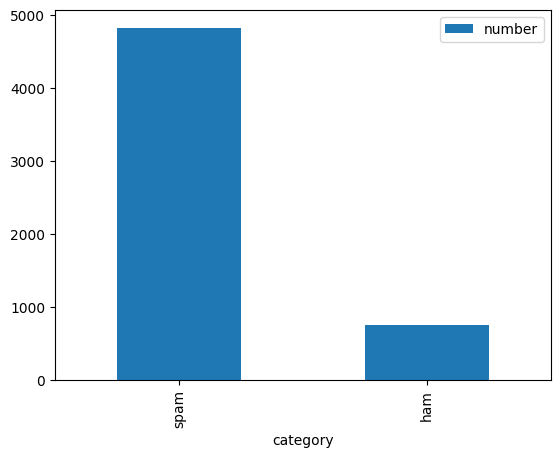

In [30]:
df_count.plot(x='category',y='number',kind='bar')
plt.show()

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
#cleaning dataset
stemmer=PorterStemmer()
corpus=[]
for w in range(len(df['Message'])):
  msg=df['Message'][w]  #read message
  msg=re.sub('[^a-zA-Z]',' ',msg)  #delete everything except letter
  msg=msg.lower()     #convert lowercase
  msg=msg.split()    #sent convert to word
  msg=[stemmer.stem(word) for word in msg if not word in set(stopwords.words('english'))] #fing stem words
  msg=' '.join(msg)  #join words into a list
  corpus.append(msg)






In [39]:
#create word vector
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf.fit(corpus)
print(tf.vocabulary_)


{'go': 2171, 'jurong': 2827, 'point': 4091, 'crazi': 1169, 'avail': 379, 'bugi': 738, 'great': 2245, 'world': 6135, 'la': 2932, 'buffet': 736, 'cine': 964, 'got': 2208, 'amor': 190, 'wat': 5957, 'ok': 3760, 'lar': 2960, 'joke': 2794, 'wif': 6056, 'oni': 3785, 'free': 2007, 'entri': 1673, 'wkli': 6101, 'comp': 1058, 'win': 6067, 'fa': 1791, 'cup': 1220, 'final': 1890, 'tkt': 5536, 'st': 5103, 'may': 3276, 'text': 5420, 'receiv': 4402, 'question': 4319, 'std': 5131, 'txt': 5695, 'rate': 4364, 'appli': 262, 'dun': 1551, 'say': 4651, 'earli': 1568, 'hor': 2477, 'alreadi': 163, 'nah': 3532, 'think': 5468, 'goe': 2175, 'usf': 5811, 'live': 3070, 'around': 302, 'though': 5485, 'freemsg': 2013, 'hey': 2408, 'darl': 1267, 'week': 5992, 'word': 6129, 'back': 414, 'like': 3042, 'fun': 2059, 'still': 5152, 'tb': 5367, 'xxx': 6202, 'chg': 922, 'send': 4721, 'rcv': 4375, 'even': 1722, 'brother': 710, 'speak': 5037, 'treat': 5638, 'aid': 118, 'patent': 3936, 'per': 3972, 'request': 4473, 'mell': 3306

In [40]:
x=tf.transform(corpus).toarray()
y=df['Category']

In [42]:
#train test split
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [47]:
x_train.shape,y_train.shape

((4457, 6296), (4457,))

In [48]:
x_test.shape,y_test.shape

((1115, 6296), (1115,))

In [44]:
#train model
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [45]:
y_pred=model.predict(x_test)

In [46]:
#compute metrics
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)

[[955   0]
 [ 34 126]]


In [49]:
from sklearn.metrics import recall_score,precision_score,accuracy_score
acc=accuracy_score(y_test,y_pred)
print(acc)
re=recall_score(y_test,y_pred)
print(re)
pre=precision_score(y_test,y_pred)
print(pre)

0.9695067264573991
0.7875
1.0
